In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load the dataset
data = pd.read_csv("C:/Users/Adebolu/Documents/Franchises Dataset.csv")
data

,Net Profit,Counter Sales,Drive-through Sales,number of customers,Business Type,Location
0,2.0,8.4,7.7,101,Cafe,Vancouver
1,1.3,3.3,4.5,59,Cafe,Vancouver
2,1.2,5.8,8.4,103,Pizza Store,Richmond
3,2.4,10.0,7.8,106,Burger store,Richmond
4,0.7,4.7,2.4,80,Cafe,Richmond
...,...,...,...,...,...,...
95,1.8,7.7,4.8,104,Burger store,Vancouver
96,0.6,4.5,2.5,80,Pizza Store,Vancouver
97,1.3,9.1,3.4,129,Pizza Store,Vancouver
98,1.0,5.9,2.2,85,Cafe,Vancouver


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Net Profit           100 non-null    float64
 1   Counter Sales        100 non-null    float64
 2   Drive-through Sales  100 non-null    float64
 3   number of customers  100 non-null    int64  
 4   Business Type        100 non-null    object 
 5   Location             100 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 4.8+ KB


In [4]:
# Display the first few rows of the dataframe and its columns to ensure it's loaded correctly
print(data.head())
print(data.columns)

   Net Profit  Counter Sales  Drive-through Sales  number of customers  \
0         2.0            8.4                  7.7                  101   
1         1.3            3.3                  4.5                   59   
2         1.2            5.8                  8.4                  103   
3         2.4           10.0                  7.8                  106   
4         0.7            4.7                  2.4                   80   

  Business Type   Location  
0          Cafe  Vancouver  
1          Cafe  Vancouver  
2   Pizza Store   Richmond  
3  Burger store   Richmond  
4          Cafe   Richmond  
Index(['Net Profit', 'Counter Sales', 'Drive-through Sales',
       'number of customers', 'Business Type', 'Location'],
      dtype='object')


In [5]:

# Encode categorical variables
data = pd.get_dummies(data, columns=['Business Type', 'Location'], drop_first=True)

In [6]:
# Split data into training and testing sets
X = data.drop(columns=['Net Profit'])
y = data['Net Profit']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train the decision tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [8]:
# Assess accuracy
dt_score = dt_model.score(X_test, y_test)
print(dt_score)

0.9814073226544623


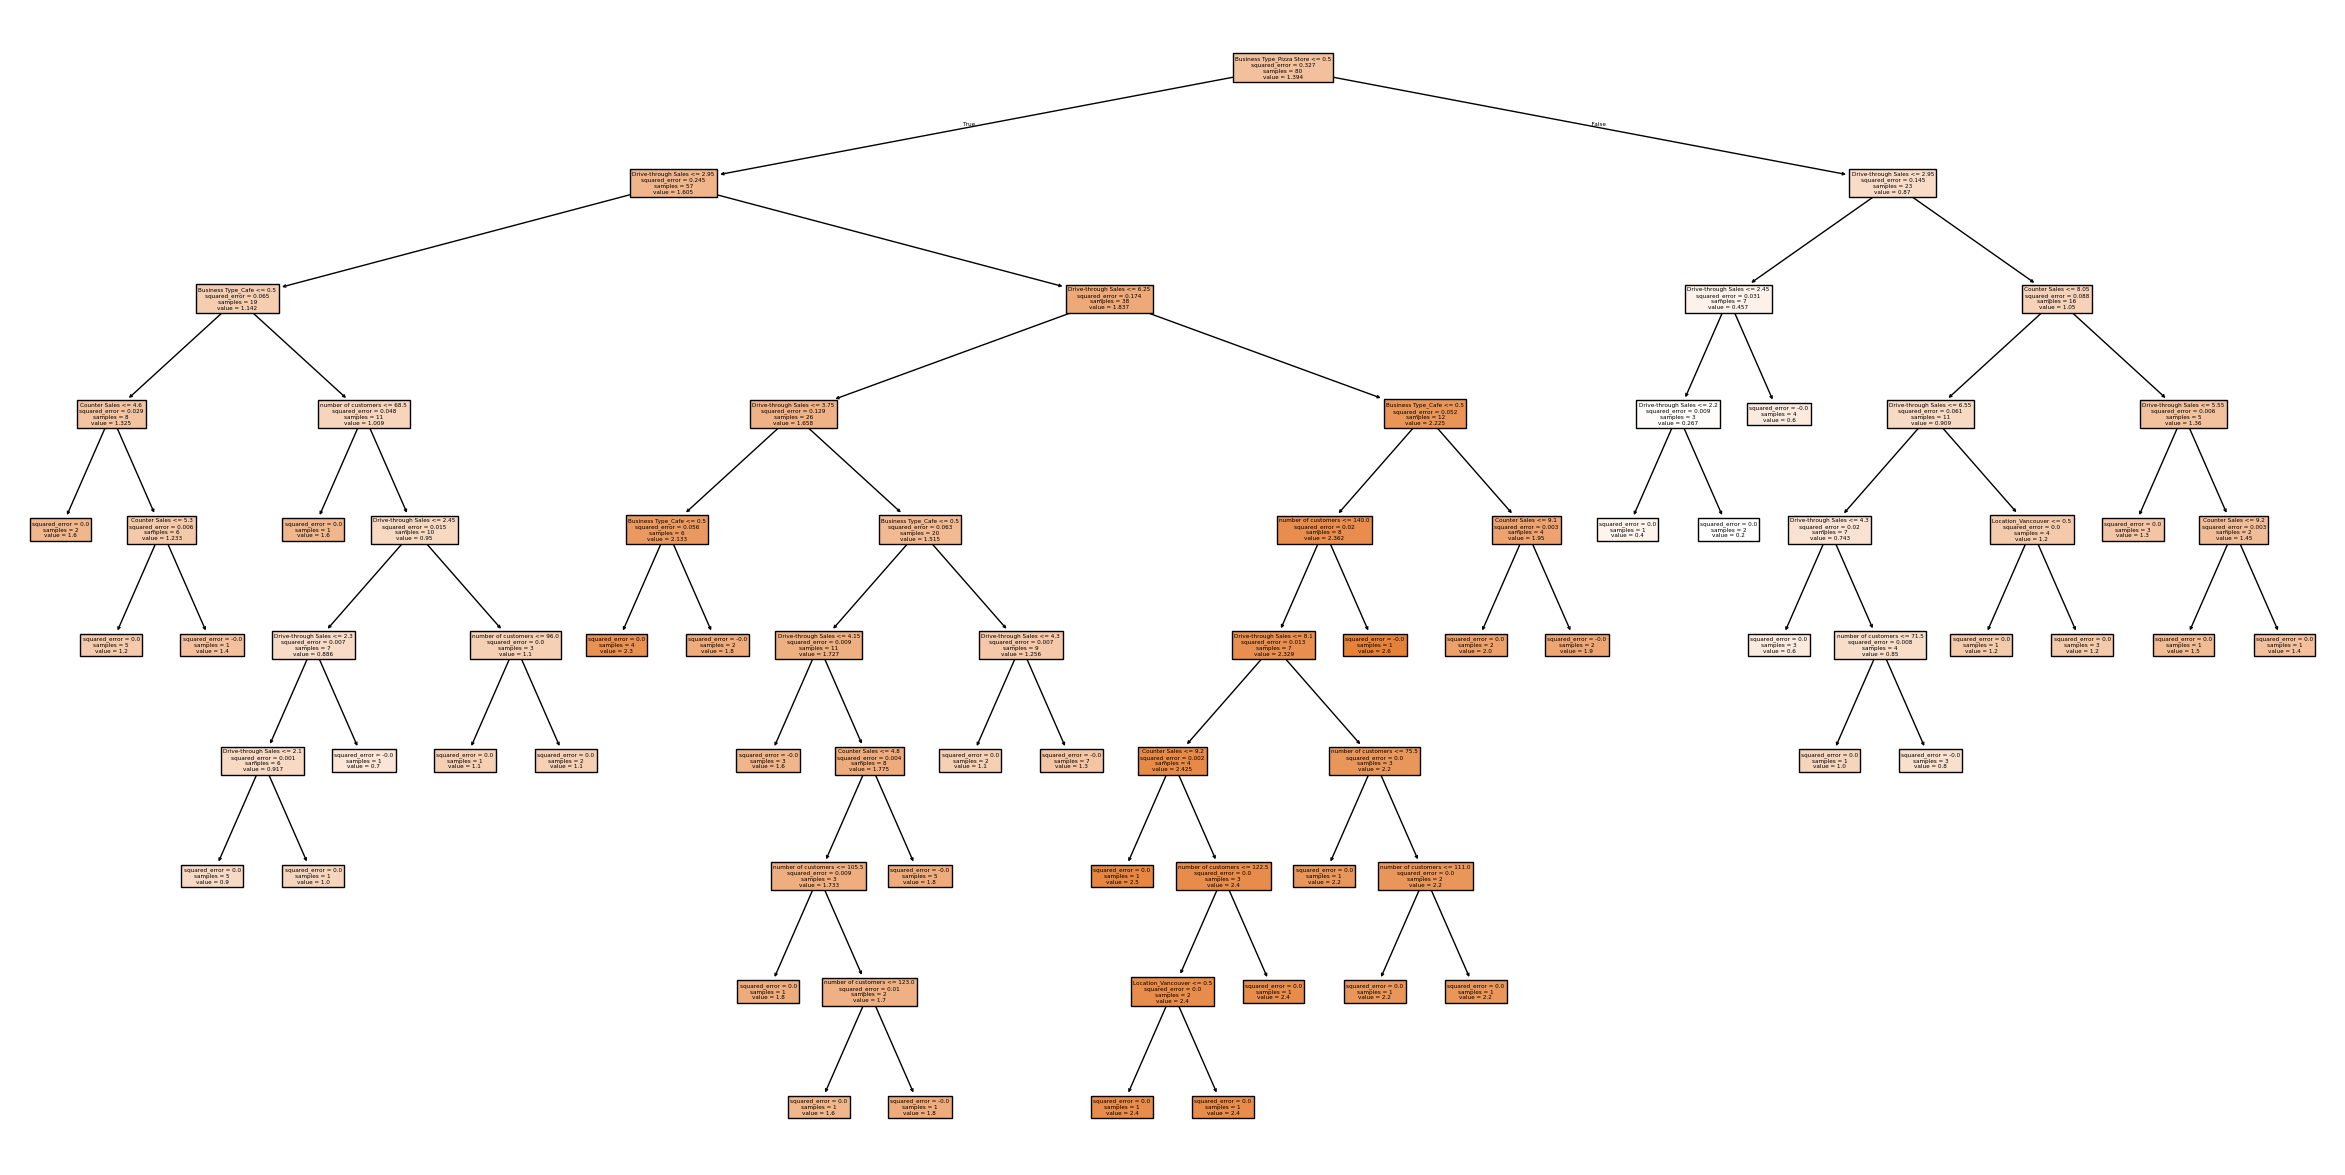

<Figure size 640x480 with 0 Axes>

In [9]:
# Visualize the decision tree
plt.figure(figsize=(30,15))
plot_tree(dt_model, feature_names=X.columns, filled=True)
plt.show()

plt.savefig('output1.png', dpi=10000)

In [10]:
#Random Forest Model

In [11]:
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=42)

In [13]:
# Predict and assess accuracy
from sklearn.metrics import mean_squared_error, r2_score
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Model - MSE: {mse_rf}, R2: {r2_rf}")

Random Forest Model - MSE: 0.030645449999999935, R2: 0.9123413901601832


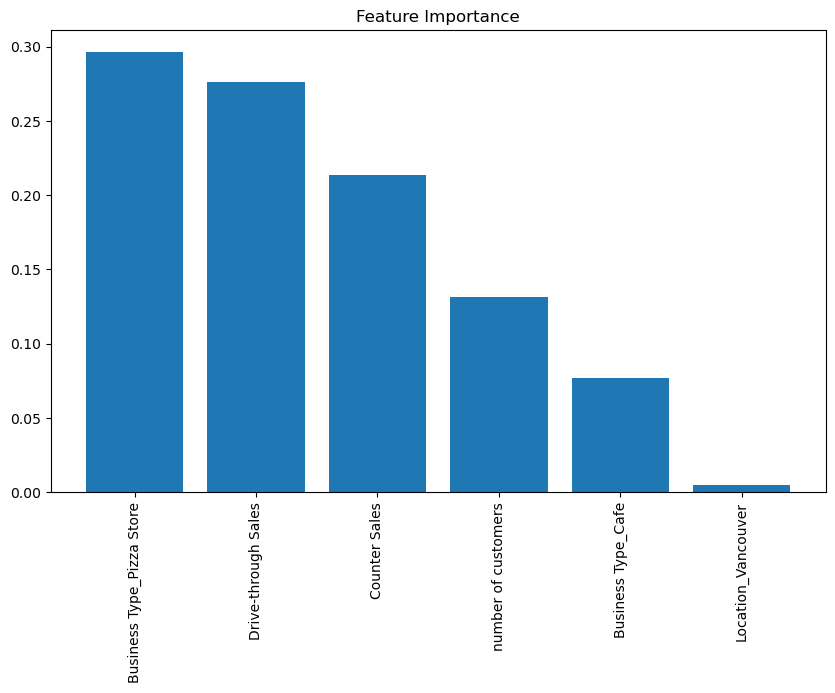

In [14]:
# Feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [X.columns[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.show()

In [15]:
#Forecasting with Both Models

In [16]:
# Forecast using both models
input_features = pd.DataFrame({
    'Counter Sales': [0.5],
    'Drive-through Sales': [0.7],
    'number of customers': [0],  # We assume a value, as it was not provided
    'Business Type_Pizza Store': [1],
    'Business Type_Burger store': [0],
    'Business Type_Cafe': [0],  # Adding missing category with zero
    'Location_Richmond': [1],
    'Location_Vancouver': [0]   # Adding missing category with zero
}, columns=X.columns)  # Ensure the columns are in the correct order



In [17]:
# Predict using both models
dt_forecast = dt_model.predict(input_features)[0]
rf_forecast = rf_model.predict(input_features)[0]


print(f"Forecasted Net Profit (Decision Tree): {dt_forecast}")
print(f"Forecasted Net Profit (Random Forest): {rf_forecast}")

Forecasted Net Profit (Decision Tree): 0.4
Forecasted Net Profit (Random Forest): 0.7920000000000003
